<a href="https://colab.research.google.com/github/Pheonix10101/PRCV_p_5/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Project 5: Recognition using Deep Networks

Author: Samruddhi Raut

This file contain following tasks
Task 2:To examine the network and analyze how it processes the data.

A.Analyze the first layer

B.Show the effect of the filters

C.Build a truncated model
"""

import torch
import cv2
import torch.nn.functional as F
from matplotlib import pyplot as plt
import CNN

**Defining Submodel**

In [ ]:
class Submodel(CNN.NeuralNetwork):
    def __init__(self):
        super().__init__()

    # override the forward method
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # relu on max pooled results of conv1
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))  # relu on max pooled results of dropout of conv2
        return x

**Defining show_filters**

In [ ]:
def show_filters(loaded_net):
    """
    Show the 10 filters used in the 1st convolutional layers
    :return weights of the layer
    """
    print("Shape of weights: ", end = "")
    print(loaded_net.conv1.weight.shape)
    fig = plt.figure()
    for i in range(10):
        plt.subplot(3, 4, i + 1)
        plt.tight_layout()
        plt.imshow(loaded_net.conv1.weight[i][0].detach().numpy(), interpolation = 'none')
        plt.title("Filter %d:" % i)
        plt.xticks([])
        plt.yticks([])
    fig.show()

    return loaded_net.conv1.weight

**DEfining show filter effects**

In [ ]:
def show_filter_effects(weights):
    """
    Show the effect of the filters
    :param weights: weights of a layer
    """
    with torch.no_grad():
        train_loader, test_loader = CNN.read_and_print(CNN.BATCH_SIZE_TRAIN,
                                                               CNN.BATCH_SIZE_TEST,
                                                               False)
        idx, (data, target) = next(enumerate(test_loader))
        img = data[0][0].detach().numpy()
        fig = plt.figure()
        for i in range(20):
            plt.subplot(5, 4, i + 1)
            plt.tight_layout()
            if (i % 2) == 0:
                plt.imshow(weights[i // 2][0].detach().numpy(), cmap = 'gray', interpolation = 'none')
            else:
                dst = cv2.filter2D(img, -1, kernel = weights[(i - 1) // 2][0].detach().numpy())
                plt.imshow(dst, cmap = 'gray', interpolation = 'none')
            plt.xticks([])
            plt.yticks([])
        fig.show()

        return train_loader, test_loader

**Define Truncation**

In [ ]:
def truncate(loaded_net, test_loader):
    """
    Show the output of the submodel
    :param loaded_net: loaded network
    :param test_loader: dataloader of the loaded network
    """
    # set model to evalution mode
    loaded_net.eval()
    extracted_example = []
    extracted_target = []

    truncated_model = Submodel()
    truncated_model.eval()

    idx, (data, target) = next(enumerate(test_loader))
    extracted_example.append(data[0])
    extracted_target.append(target[0])

    example = torch.stack(extracted_example)
    print("Input.shape: ", end = "")
    print(example.shape)

    with torch.no_grad():
        output = truncated_model(example)
        print("Output shape: ", end = "")
        print(output.shape)

    fig = plt.figure()
    for i in range(20):
        plt.subplot(5, 4, i + 1)
        plt.tight_layout()
        plt.imshow(output[0][i].detach().numpy(), cmap = 'gray', interpolation = 'none')
        plt.title("Node %d:" % i)
        plt.xticks([])
        plt.yticks([])
    fig.show()

**Defining Main function**

Shape of weights: torch.Size([10, 1, 5, 5])


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Input.shape: torch.Size([1, 1, 28, 28])
Output shape: torch.Size([1, 20, 4, 4])


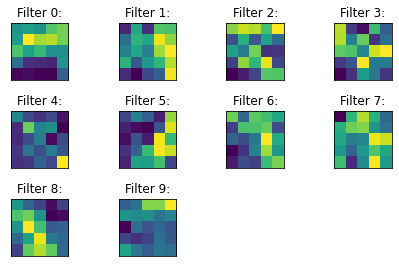

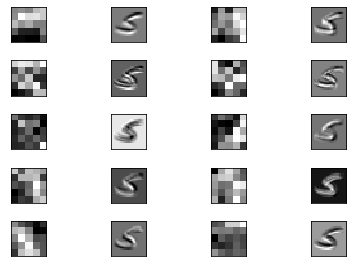

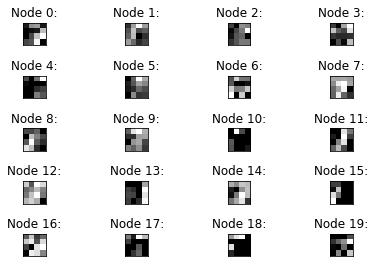

In [ ]:
def main():
    # load the model from file
    loaded_net = CNN.NeuralNetwork()
    loaded_net_state_dict = torch.load('samruddhi_neural.pt')
    loaded_net.load_state_dict(loaded_net_state_dict)

    weights = show_filters(loaded_net)
    train_loader, test_loader = show_filter_effects(weights)
    truncate(loaded_net, test_loader)


if __name__ == "__main__":
    main()